# 感知机

感知机是二分类的线性分类模型，输入为实例的特征向量，输出为实例的类别，取+1 和-1 两个值。
感知机学习旨在求出将数据进行线性划分的分离超平面。包括原始形式和对偶形式。

$$
f(x)=sign(w \cdot x + b)
$$

感知机的学习策略是极小化损失函数

$$
\min\limits_{w, b} L(w, b) = - \sum\limits_{x_i \in M} y_i (w \cdot x_i + b)
$$


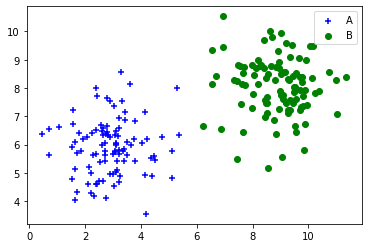

In [1]:
import numpy as np
import matplotlib.pyplot as plt

dot_num = 100
x_p = np.random.normal(3., 1, dot_num)
y_p = np.random.normal(6., 1, dot_num)
y = np.ones(dot_num)
C1 = np.array([x_p, y_p, y]).T

x_n = np.random.normal(9., 1, dot_num)
y_n = np.random.normal(8., 1, dot_num)
y = np.zeros(dot_num) - 1
C2 = np.array([x_n, y_n, y]).T

plt.scatter(C1[:, 0], C1[:, 1], marker='+', color='b', label='A')
plt.scatter(C2[:, 0], C2[:, 1], marker='o', color='g', label='B')
plt.legend()

In [20]:
data_set = np.concatenate((C1, C2), axis=0)
np.random.shuffle(data_set)

In [32]:
class Perception():
    def __init__(self):
        self.weights = None
        self.bias = None
        self.lr = 0.01
    
    def sign(self, value):
        return 1 if value > 0 else -1

    def train(self, data_set, labels):
        n = data_set.shape[0]
        m = data_set.shape[1]
        weights = np.ones(m)
        bias = 0
        i = 0
        while i < n:
            if (labels[i] * self.sign(np.dot(weights, data_set[i]) + bias)) <= 0:
                weights += self.lr * labels[i] * data_set[i]
                bias += self.lr * labels[i]
                i = 0
            else:
                i += 1
        self.weights = weights
        self.bias = bias

    def predict(self, data):
        if self.weights is None or self.bias is None:
            raise Exception('You must train the model first!')
        return self.sign(np.dot(self.weights, data) + self.bias)

In [33]:
perception = Perception()
perception.train(data_set[:, :2], data_set[:, 2])
print("weights is ", perception.weights)
print("bias is ", perception.bias)

weights is  [-0.21597906  0.00716254]
bias is  1.2100000000000009


In [38]:
# 测试验证
result = [perception.predict(data) for data in data_set[:, :2]]
np.equal(result, data_set[:, 2]).sum() / data_set.shape[0]

1.0